# Importing necessary packages

In [1]:
import pandas as pd
import nltk
import csv
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from matplotlib import pylab
import unicodedata
#from fastai.text import *
#nltk.download()
import string
import math
import json

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [3]:
from IPython.display import clear_output

In [4]:
from matplotlib import pylab

In [5]:
import h5py
from nltk.util import ngrams

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

# Getting the corpus

In [ ]:
# from wiki_dump_reader import Cleaner, iterate

# #https://github.com/CyberZHG/wiki-dump-reader
# #pip install wiki-dump-reader
# #Code adapted from https://github.com/CyberZHG/wiki-dump-reader
# def write_corpus():
#     corpus_file = 'CorpusFileName.txt'
#     page_count = 0
#     cleaner = Cleaner()
#     with open(corpus_file, 'w', encoding='utf-8') as output:
#         for title, text in iterate('tawiki-latest-pages-articles.xml'):
#             text = cleaner.clean_text(text)
#             cleaned_text, links = cleaner.build_links(text)
#             output.write(title + '\n' + cleaned_text + '\n')
#             page_count += 1
#             if page_count % 100 == 0:
#                 print('Pages dumped = ', page_count)

#     output.close()
# write_corpus()

In [ ]:
# def write_corpus():
#     corpus_file = 'Corpus_1000.txt'
#     page_count = 0
#     cleaner = Cleaner()
#     with open(corpus_file, 'w', encoding='utf-8') as output:
#         for title, text in iterate('tawiki-latest-pages-articles.xml'):
#             text = cleaner.clean_text(text)
#             cleaned_text, links = cleaner.build_links(text)
#             output.write(title + '\n' + cleaned_text + '\n')
#             page_count += 1
#             if page_count == 1000:
#                 print('Pages dumped = ', page_count)
#                 break

#     output.close()
# write_corpus()

In [ ]:
# def write_corpus():
#     corpus_file = 'Corpus_100.txt'
#     page_count = 0
#     cleaner = Cleaner()
#     with open(corpus_file, 'w', encoding='utf-8') as output:
#         for title, text in iterate('tawiki-latest-pages-articles.xml'):
#             text = cleaner.clean_text(text)
#             cleaned_text, links = cleaner.build_links(text)
#             output.write(title + '\n' + cleaned_text + '\n')
#             page_count += 1
#             if page_count == 100:
#                 print('Pages dumped = ', page_count)
#                 break

#     output.close()
# write_corpus()

# Preprocessing

In [6]:
file = open('CorpusFileName.txt', 'rt')
text = file.read()
file.close()

In [7]:
tokens = word_tokenize(text)
#print(tokens[:100])

In [9]:
# Remving punctuations
punc = list(string.punctuation)
rmpunc = [w for w in tokens if w not in punc]

In [11]:
temp = rmpunc.copy()

In [12]:
sw = open('TamilStopWords.txt', 'rt')
stpwrds = sw.read()
sw.close()

In [13]:
stop_words = word_tokenize(stpwrds)
#print(stop_words[:100])

In [14]:
stop_words.append('')

In [15]:
len(stop_words)

126

In [16]:
# Removing stop words:
for w in stop_words:
    temp = list(filter((w).__ne__, temp))

In [17]:
vocab = set(temp)

In [18]:
stpw = set(stop_words)

In [19]:
tokn = vocab - stpw

In [20]:
words = [word for word in temp if not word.isalpha() and not word.isdigit()]
#print(words[:100])

In [22]:
def is_tamil(word):
    try:
        lang = unicodedata.name(word.strip()[0])
        if 'TAMIL' in lang:
            return True
        else:
            return False
    except:
        return False

In [23]:
# Removing other language words
tamil_words = [word for word in words if (is_tamil(word))] 

# Zip's Law

In [24]:
import re
from operator import itemgetter    
 
frequency = {}
#open_file = open('d2016.bin', 'r')
#file_to_string = open_file.read()
#words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)
 
for word in tamil_words:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
# for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
#     print(key, value)

In [25]:
sortd = sorted(frequency.items(), key = itemgetter(1), reverse = True)

In [26]:
sortd_lis = []
i = 1
for key, value in sortd:
    sortd_lis.append((key, value, i))
    i += 1

In [27]:
sortd_lis[4]

('ஜெர்மனி', 155968, 5)

In [29]:
def H_approx(n):
    """
    Returns an approximate value of n-th harmonic number.
    http://en.wikipedia.org/wiki/Harmonic_number
    """
    # Euler-Mascheroni constant
    gamma = 0.57721566490153286060651209008240243104215933593992
    return gamma + math.log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)

In [30]:
T = len(tamil_words)
n = len(sortd_lis)

In [31]:
k = T/H_approx(n)

In [32]:
ef = [k/i for i in range(1, n+1) ]

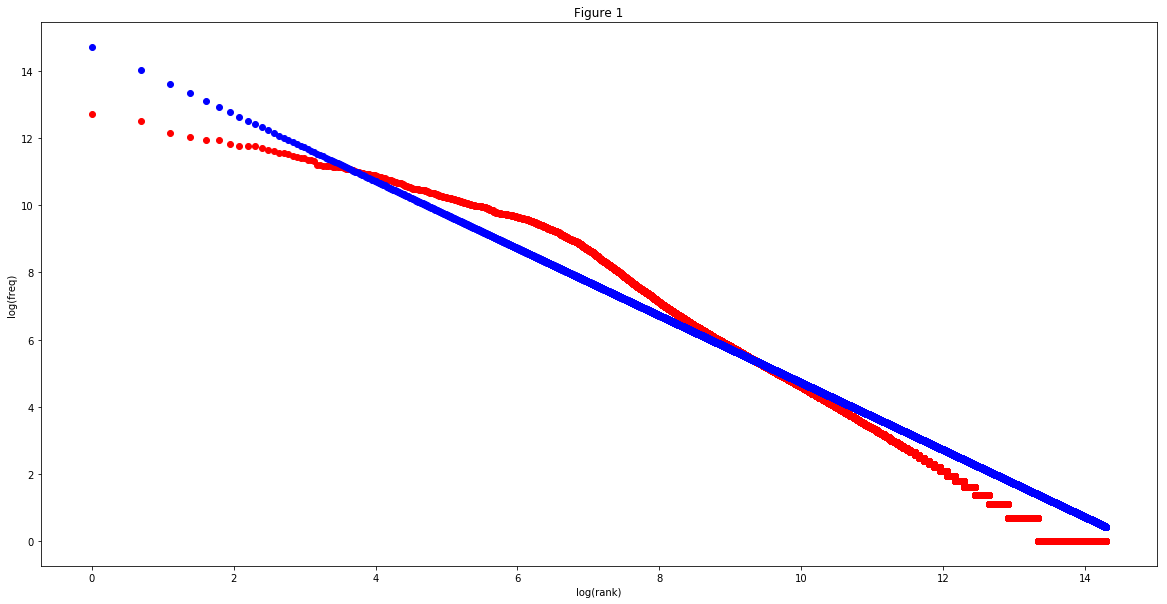

In [34]:
plt.figure(figsize=(20,10))
n = len(sortd_lis)
ranks = range(1, n+1) 
freqs = [freq for (word, freq, rank) in sortd_lis] # y-axis: the frequencies
#pylab.loglog(ranks, freqs)#this plots frequency, not relative frequency
plt.plot([math.log(c) for c in ranks], [math.log(c) for c in freqs], 'ro')
plt.plot([math.log(c) for c in ranks], [math.log(c) for c in ef], 'bo')
#pylab.loglog(ranks, ef, 'r')
plt.title('Figure 1')
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
#pylab.legend(loc='lower left')
pylab.show()

In [37]:
k

2467758.6677210676

By looking at the Figure 1 of Zipf's law graph, the middle frequency range of the vocabulary is,

In [43]:
middle_freqency_range = []
zips_words = []
for (word, freq, rank) in sortd_lis:
    if freq >= 20 and freq <= 59874:
        middle_freqency_range.append(word)
        #print(freq*rank)
        if ((freq*rank) >= k_round and (freq*rank) <= (k_round + 1000)) or ((freq*rank) <= k_round and (freq*rank) >= (k_round - 1000)):
            zips_words.append((word, freq))

In [44]:
len(middle_freqency_range)

81430

In [48]:
zips_words

[('நிகழ்வாக', 216),
 ('பாராளுமன்றத்திற்கு', 216),
 ('கிரக', 215),
 ('பொதுமக்களுக்கு', 215),
 ('மொழிகளைப்', 215),
 ('கதாபாத்திரங்கள்', 215),
 ('உரையாசிரியர்கள்', 215),
 ('தீயில்', 215),
 ('காலத்தைக்', 215),
 ('நிதியம்', 215),
 ('நபருக்கு', 215),
 ('மீண்டு', 214),
 ('திடீரென்று', 214),
 ('அம்மோனியம்', 214),
 ('அவர்களைத்', 214),
 ('விழாக்களில்', 214),
 ('தேனீ', 214),
 ('யாக', 214),
 ('யாகம்', 214),
 ('செல்லவும்', 214),
 ('தொடு', 214),
 ('அல்லி', 213),
 ('பலவித', 213),
 ('போதனை', 213),
 ('மகாகவி', 213),
 ('விளாத்திகுளம்', 213),
 ('எங்க', 213),
 ('தப்பிச்', 213),
 ('இயக்குநராகவும்', 213),
 ('சத்தியமங்கலம்', 213),
 ('அமீன்', 212),
 ('கவுண்டமணி', 212),
 ('நுட்பமான', 212),
 ('போனார்', 212),
 ('சந்திப்பில்', 212),
 ('புதர்', 212),
 ('குடியாத்தம்', 212),
 ('நாட்', 212),
 ('கொதிநிலை', 212),
 ('வீரபத்திரர்', 212),
 ('பரிந்துரைக்கப்படுகிறது', 211),
 ('யுவர்', 211),
 ('பொன்னியம்மன்', 211)]

In [45]:
w = []
for word, freq in zips_words:
    w.append(word)

In [46]:
len(w)

43

In [48]:
noun = ['கல்லூரி', 'கடல்', 'அரசியல்', 'பெயர்', 'மக்கள்', 'நபர்கள்', 'நூல்கள்', 'பாடல்', 'தொழில்கள்', 'அளவு']

In [49]:
verb = ['போதனை', 'செல்லவும்', 'போனார்', 'படி', 'தயாரிக்க', 'தொடு', 'மாற்ற', 'முடியும்', 'வெளிப்படுத்துகிறது', 'செய்யப்பட்ட']

In [50]:
adjective =['மதிப்புள்ள', 'மிகப்பெரிய', 'தாழ்ந்த', 'முன்னணி', 'ஆரோக்கிய', 'மிகச்சிறிய', 'வெப்ப', 'பழைய', 'முதன்மைத்', 'நிலையான']

In [51]:
similar_verb = ['வாசி', 'செய்ய', 'சாத்தியம்', 'போ', 'ஸ்பரிசம்']

In [52]:
similar_noun = ['ஆழி', 'புத்தகம்', 'மனிதர்கள்', 'பல்கலைக்கழகம்', 'நாமம்']

In [53]:
similar_adjective = ['நலமான', 'சூடு', 'நிரந்தரம்', 'மரியாதை', 'தொன்மை']

In [54]:
verb_score = np.array([['போதனை', 6, 7, 4, 1, 1], ['செல்லவும்',1, 2, 1, 10, 1], ['போனார்', 1, 2, 1, 10, 1], ['படி', 10, 7, 1, 1, 1], ['தயாரிக்க', 1, 10, 2, 1, 1], ['தொடு', 1, 1, 1, 1, 10], ['மாற்ற', 1, 7, 5, 2, 1], ['முடியும்', 1, 7, 10, 1, 1], ['வெளிப்படுத்துகிறது', 1, 1, 1, 1, 1], ['செய்யப்பட்ட', 1, 9.5, 8, 1, 1]])


In [55]:
df_verb = pd.DataFrame(verb_score, columns = ['Target_words'] + similar_verb)

In [56]:
df_verb

,Target_words,வாசி,செய்ய,சாத்தியம்,போ,ஸ்பரிசம்
0,போதனை,6,7,4,1,1
1,செல்லவும்,1,2,1,10,1
2,போனார்,1,2,1,10,1
3,படி,10,7,1,1,1
4,தயாரிக்க,1,10,2,1,1
5,தொடு,1,1,1,1,10
6,மாற்ற,1,7,5,2,1
7,முடியும்,1,7,10,1,1
8,வெளிப்படுத்துகிறது,1,1,1,1,1
9,செய்யப்பட்ட,1,9.5,8,1,1


In [57]:
noun_score = np.array([['கல்லூரி', 1, 7, 8, 9.5, 5], ['கடல்', 10, 5, 4, 1, 1], ['அரசியல்', 1, 6, 8, 7, 1], ['பெயர்', '3', '1', '7.5', '1', '10'], ['மக்கள்', 3, 4, 10, 7, 7.5], ['நபர்கள்', 3, 4, 10, 7, 7.5], ['நூல்கள்', 3, 10, 8, 8.5, 2], ['பாடல்', 2, 5, 6, 4, 3.5], ['தொழில்கள்', 2, 6, 7, 7, 3.5], ['அளவு', 6, 5, 7, 6, 1]])


In [58]:
df_noun = pd.DataFrame(noun_score, columns = ['Target_words'] + similar_noun)

In [59]:
df_noun

,Target_words,ஆழி,புத்தகம்,மனிதர்கள்,பல்கலைக்கழகம்,நாமம்
0,கல்லூரி,1,7,8,9.5,5
1,கடல்,10,5,4,1,1
2,அரசியல்,1,6,8,7,1
3,பெயர்,3,1,7.5,1,10
4,மக்கள்,3,4,10,7,7.5
5,நபர்கள்,3,4,10,7,7.5
6,நூல்கள்,3,10,8,8.5,2
7,பாடல்,2,5,6,4,3.5
8,தொழில்கள்,2,6,7,7,3.5
9,அளவு,6,5,7,6,1


In [60]:
adjective_score = np.array([['மதிப்புள்ள', 7, 1, 6, 10, 6], ['மிகப்பெரிய', 1, 1, 1, 1, 1], ['தாழ்ந்த', 1,1,1,4,1], ['முன்னணி', 6, 1, 6, 6, 5], ['ஆரோக்கிய', 9, 3, 4, 3, 2], ['மிகச்சிறிய', 1, 1, 1, 1, 1], ['வெப்ப', 4, 10, 1, 1, 7], ['பழைய', 2, 1, 3, 5, 10], ['முதன்மைத்', 6, 1, 5, 7, 8], ['நிலையான', 4, 1, 10, 5, 8]])

In [61]:
df_adjective = pd.DataFrame(adjective_score, columns = ['Target_words'] + similar_adjective)

In [62]:
df_adjective

,Target_words,நலமான,சூடு,நிரந்தரம்,மரியாதை,தொன்மை
0,மதிப்புள்ள,7,1,6,10,6
1,மிகப்பெரிய,1,1,1,1,1
2,தாழ்ந்த,1,1,1,4,1
3,முன்னணி,6,1,6,6,5
4,ஆரோக்கிய,9,3,4,3,2
5,மிகச்சிறிய,1,1,1,1,1
6,வெப்ப,4,10,1,1,7
7,பழைய,2,1,3,5,10
8,முதன்மைத்,6,1,5,7,8
9,நிலையான,4,1,10,5,8


In [63]:
# grams11 contains all the ngrams of size 11
# vocab_idx - a dictionary with of the sorted vocabulary stored in the  'word:index' format

In [64]:
w = middle_freqency_range[:1000]

In [69]:
voc_count=len(w)

In [70]:
dic = dict(enumerate(w))
vocab_idx = dict([(value, key) for key, value in dic.items()])

In [71]:
hal_l2r = pd.DataFrame(np.zeros((voc_count,voc_count)),dtype=np.int64)
hal_r2l = pd.DataFrame(np.zeros((voc_count,voc_count)),dtype=np.int64)
ramp = [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
grams11 = ngrams(tamil_words, 11, pad_right=True, pad_left=True)

In [72]:
for index, grams in enumerate(list(grams11)):
    #print(index)
    reversed_grams = grams[::-1]
    #print(reversed_grams)
    if None not in grams:
        #print(grams)
        for idx, gram in enumerate(grams):  # Left to right
            #print((grams[0], grams[idx]))
            if (gram in w) and (grams[0] in w):
                hal_l2r[vocab_idx[grams[0]]][vocab_idx[grams[idx]]] += ramp[idx] #h5py dataset for l2r

        for idx, gram in enumerate(reversed_grams):  # right to left
            #print((reversed_grams[0], reversed_grams[idx]))
            if (reversed_grams[idx] in w) and (reversed_grams[0] in w):
                hal_r2l[vocab_idx[reversed_grams[0]]][vocab_idx[reversed_grams[idx]]] += ramp[idx] #h5py dataset for r2l

In [74]:
hdf5file = pd.HDFStore('tamil_hal.hdf5', 'w') 
hdf5file['hal_l2r'] = hal_l2r
hdf5file['hal_r2l'] = hal_r2l
hdf5file.close()

In [76]:
with pd.HDFStore('tamil_hal.hdf5',  mode='r') as newstore:
    df_hal_l2r = newstore.select('hal_l2r')
    df_hal_r2l = newstore.select('hal_r2l')

In [77]:
df = (df_hal_l2r+df_hal_r2l)/2
del df_hal_l2r, df_hal_r2l

In [133]:
df.index = middle_freqency_range[:1000]

In [138]:
# compute cosine similarity for given word vector   
def cosinesim(row,row_data):
    row=np.array(row)
    row=row.reshape(1, -1)
    return cosine_similarity(row, row_data, dense_output=False)
   

## find similar words
def find_similar_word(context_word):
    # get row word vector for given word
    row_data = df.loc[context_word]
    row_data=np.array(row_data)
    row_data=row_data.reshape(1, -1)    
    # iterate through vocabulary and find cosine similarity with other word vector
    data=df.apply(cosinesim, args=(row_data,),axis=1)
    
    ## return top 5 matching words
    return data.sort_values(ascending = False).head(6)

In [143]:
for wrd in noun:
    print(wrd)
    print(find_similar_word(wrd))

கல்லூரி
கல்லூரி      [[1.0000000000000002]]
மத்திய       [[0.3251440653616454]]
கல்வி        [[0.2897497354935256]]
சென்னை      [[0.24068969810261803]]
மதுரை       [[0.22857307798136953]]
வருகிறது     [[0.1959374297822575]]
dtype: object
கடல்
கடல்        [[0.9999999999999998]]
சோடியம்      [[0.572849275445332]]
சார்ந்த     [[0.2785058812122057]]
மீட்டர்    [[0.26293782996655657]]
அதிகமான    [[0.24344803112326527]]
ஆய்வு      [[0.24321543978004137]]
dtype: object
அரசியல்
அரசியல்      [[0.9999999999999999]]
கட்சி         [[0.748199216196695]]
இணைந்து       [[0.623400550590125]]
இலங்கை        [[0.575588819736971]]
தொடர்ந்து     [[0.532458848230024]]
வருகிறது     [[0.5308898582584376]]
dtype: object
பெயர்
பெயர்        [[1.0000000000000002]]
முதலில்      [[0.5724633282729573]]
காலத்தில்    [[0.5363079672083726]]
இவரது        [[0.5118261740108867]]
தொடர்ந்து    [[0.4524745044427584]]
வருகிறது     [[0.4378120834156535]]
dtype: object
மக்கள்
மக்கள்               [[1.0000000000000002]]
கணக்கெடு

In [148]:
l = open('noun_Similar_Word.txt', "w", encoding='utf-8')
for ta_word in noun:
    line = ""
    line +="\n"+"\n"+ ta_word + "\n"
    simi_word=find_similar_word(ta_word)
    line += simi_word.to_string() + "\n"+"\n"
    print(line)
    l.write(line)
    
l.close()



கல்லூரி
கல்லூரி      [[1.0000000000000002]]
மத்திய       [[0.3251440653616454]]
கல்வி        [[0.2897497354935256]]
சென்னை      [[0.24068969810261803]]
மதுரை       [[0.22857307798136953]]
வருகிறது     [[0.1959374297822575]]




கடல்
கடல்        [[0.9999999999999998]]
சோடியம்      [[0.572849275445332]]
சார்ந்த     [[0.2785058812122057]]
மீட்டர்    [[0.26293782996655657]]
அதிகமான    [[0.24344803112326527]]
ஆய்வு      [[0.24321543978004137]]




அரசியல்
அரசியல்      [[0.9999999999999999]]
கட்சி         [[0.748199216196695]]
இணைந்து       [[0.623400550590125]]
இலங்கை        [[0.575588819736971]]
தொடர்ந்து     [[0.532458848230024]]
வருகிறது     [[0.5308898582584376]]




பெயர்
பெயர்        [[1.0000000000000002]]
முதலில்      [[0.5724633282729573]]
காலத்தில்    [[0.5363079672083726]]
இவரது        [[0.5118261740108867]]
தொடர்ந்து    [[0.4524745044427584]]
வருகிறது     [[0.4378120834156535]]




மக்கள்
மக்கள்               [[1.0000000000000002]]
கணக்கெடுப்பின்படி      [[0.91045373915033]]
இந